In [1]:
%matplotlib inline

This section runs through the API for common tasks in machine learning. Refer to the links in each section to dive deeper.

## Working with data
PyTorch has two [primitives to work with data](https://pytorch.org/docs/stable/data.html):
``torch.utils.data.DataLoader`` and ``torch.utils.data.Dataset``.
``Dataset`` stores the samples and their corresponding labels, and ``DataLoader`` wraps an iterable around
the ``Dataset``.


In [2]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor

PyTorch offers domain-specific libraries such as [TorchText](https://pytorch.org/text/stable/index.html),
[TorchVision](https://pytorch.org/vision/stable/index.html), and [TorchAudio](https://pytorch.org/audio/stable/index.html),
all of which include datasets. For this tutorial, we  will be using a TorchVision dataset.

The ``torchvision.datasets`` module contains ``Dataset`` objects for many real-world vision data like
CIFAR, COCO ([full list here](https://pytorch.org/vision/stable/datasets.html)). In this tutorial, we
use the FashionMNIST dataset. Every TorchVision ``Dataset`` includes two arguments: ``transform`` and
``target_transform`` to modify the samples and labels respectively.



This guide uses the [Fashion MNIST](https://github.com/zalandoresearch/fashion-mnist) dataset which contains grayscale images in different categories. The images show individual articles of clothing at low resolution (28 by 28 pixels), as seen here:

<table>
  <tr><td>
    <img src="https://tensorflow.org/images/fashion-mnist-sprite.png"
         alt="Fashion MNIST sprite"  width="600">
  </td></tr>
  <tr><td align="center">
    <b>Figure 1.</b> <a href="https://github.com/zalandoresearch/fashion-mnist">Fashion-MNIST samples</a> (by Zalando, MIT License).<br/>&nbsp;
  </td></tr>
</table>

Fashion MNIST is intended as a drop-in replacement for the classic [MNIST](http://yann.lecun.com/exdb/mnist/) dataset—often used as the "Hello, World" of machine learning programs for computer vision. The MNIST dataset contains images of handwritten digits (0, 1, 2, etc.) in a format identical to that of the articles of clothing you'll use here.

This guide uses Fashion MNIST for variety, and because it's a slightly more challenging problem than regular MNIST. Both datasets are relatively small and are used to verify that an algorithm works as expected.

In [3]:
# Download training data from open datasets.
training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
)

# Download test data from open datasets.
test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
)

We pass the ``Dataset`` as an argument to ``DataLoader``. This wraps an iterable over our dataset, and supports
automatic batching, sampling, shuffling and multiprocess data loading. Here we define a batch size of 64, i.e. each element
in the dataloader iterable will return a batch of 64 features and labels.



In [4]:
batch_size = 64

# Create data loaders.
train_dataloader = DataLoader(training_data, batch_size=batch_size)
test_dataloader = DataLoader(test_data, batch_size=batch_size)

for X, y in test_dataloader:
    print(f"Shape of X [N, C, H, W]: {X.shape}") # N = nombre d'images (batch size), C = channel (1 pour gris, 3 pour RGB), H = hauteur de l'image, W = largeur de l'image
    print(f"Shape of y: {y.shape} {y.dtype}") # Nombre de labels dans le batch
    break

Shape of X [N, C, H, W]: torch.Size([64, 1, 28, 28])
Shape of y: torch.Size([64]) torch.int64


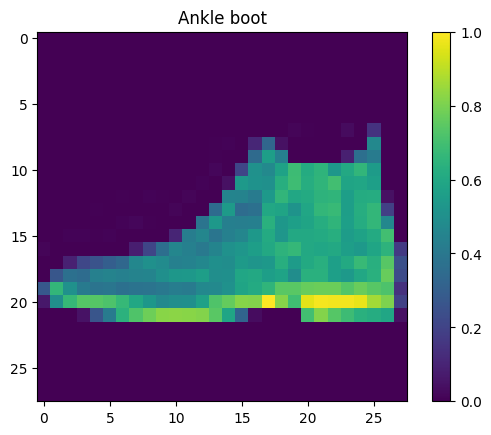

In [5]:
import matplotlib.pyplot as plt

class_names = {0:'T-shirt/top', 1:'Trouser', 2:'Pullover', 3:'Dress', 4:'Coat',
               5:'Sandal', 6:'Shirt', 7:'Sneaker', 8:'Bag', 9:'Ankle boot'}
               
plt.figure()
plt.imshow(X[0][0])
plt.title(class_names[int(y[0])])
plt.colorbar()
plt.grid(False)
plt.show()

Read more about [loading data in PyTorch](data_tutorial.html).




<div style="border: solid 3px #fff;">
    <h1 style="text-align: center; color:#fff; font-family:Georgia; font-size:26px;">Exercise</h1>
    <h1 style="text-align: left; color:#fff; font-family:Courier; font-size:16px;"> &emsp; 1. Using len, find the number of samples in train_dataloader and test_dataloader? </h1>
    <p style='text-align: left;'> </p>
     <h1 style="text-align: left; color:#fff; font-family:Courier; font-size:16px;"> &emsp; 2. How many times backpropagation would be done in each epoch?</h1>
    <p style='text-align: left;'> </p>
</div>

In [6]:
# your code is missing here
print("Train length: ", len(training_data))

print("Test length: ", len(test_data))

#Nombre d'epoch
print("Number of backpropagation per epoch in train_dataloader: ", len(train_dataloader)) # lié au batch size
print("Number of backpropagation per epoch in test_dataloader: ", len(test_dataloader))


Train length:  60000
Test length:  10000
Number of backpropagation per epoch in train_dataloader:  938
Number of backpropagation per epoch in test_dataloader:  157


## Creating Models
To define a neural network in PyTorch, we create a class that inherits
from [nn.Module](https://pytorch.org/docs/stable/generated/torch.nn.Module.html). We define the layers of the network
in the ``__init__`` function and specify how data will pass through the network in the ``forward`` function. To accelerate
operations in the neural network, we move it to the GPU if available.



In [7]:
# Get cpu or gpu device for training.
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")

# Define model
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.first_layer = nn.Linear(28*28, 128) # 28*28 = taille des images en entrée
        self.second_layer =nn.Linear(128, 10) # 10 = taille de sortie (nombre de labels)
        self.activation_layer= nn.ReLU()

    def forward(self, x):
        x1 = self.flatten(x)
        x2 = self.first_layer(x1)
        x3 = self.activation_layer(x2)
        logits = self.second_layer(x3)
        return logits

model = NeuralNetwork().to(device)
print(model)

Using cpu device
NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (first_layer): Linear(in_features=784, out_features=128, bias=True)
  (second_layer): Linear(in_features=128, out_features=10, bias=True)
  (activation_layer): ReLU()
)


Read more about [building neural networks in PyTorch](buildmodel_tutorial.html).




### Model's complexity = number of parameters in the model

In [8]:
def num_params(model):
    pytorch_total_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
    return pytorch_total_params

print(f"Number of trainable parameters in model : {num_params(model)}")

Number of trainable parameters in model : 101770


## Optimizing the Model Parameters
To train a model, we need a [loss function](https://pytorch.org/docs/stable/nn.html#loss-functions)
and an [optimizer](https://pytorch.org/docs/stable/optim.html).



In [21]:
loss_fn = nn.CrossEntropyLoss() # Pour calculer l'erreur entre prediction et label
optimizer = torch.optim.SGD(model.parameters(), lr=1e-1) # Pour mettre à jour les paramètres du modèle avec comme pas le learning rate de 0.1

In a single training loop, the model makes predictions on the training dataset (fed to it in batches), and
backpropagates the prediction error to adjust the model's parameters.



In [9]:
#!pip install tqdm
#from tqdm import tqdm 
def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    model.train()
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)

        # Compute prediction error
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation = modification des poids du modèle
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch % 100 == 0:
            loss, current = loss.item(), batch * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

We also check the model's performance against the test dataset to ensure it is learning.



In [10]:
def test(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval()
    test_loss, correct = 0, 0
    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
    test_loss /= num_batches
    correct /= size
    print(f"Test : \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

The training process is conducted over several iterations (*epochs*). During each epoch, the model learns
parameters to make better predictions. We print the model's accuracy and loss at each epoch; we'd like to see the
accuracy increase and the loss decrease with every epoch.



In [20]:
epochs = 10
test(test_dataloader, model, loss_fn)
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train(train_dataloader, model, loss_fn, optimizer)
    test(test_dataloader, model, loss_fn)
print("Done!")

Test : 
 Accuracy: 8.3%, Avg loss: 2.319570 

Epoch 1
-------------------------------
loss: 2.314191  [    0/60000]
loss: 0.850323  [ 6400/60000]
loss: 0.542899  [12800/60000]
loss: 0.692163  [19200/60000]
loss: 0.592589  [25600/60000]
loss: 0.533356  [32000/60000]
loss: 0.563551  [38400/60000]
loss: 0.602456  [44800/60000]
loss: 0.632774  [51200/60000]
loss: 0.473304  [57600/60000]
Test : 
 Accuracy: 79.0%, Avg loss: 0.569730 

Epoch 2
-------------------------------
loss: 0.445786  [    0/60000]
loss: 0.443942  [ 6400/60000]
loss: 0.357692  [12800/60000]
loss: 0.469889  [19200/60000]
loss: 0.423778  [25600/60000]
loss: 0.475235  [32000/60000]
loss: 0.447572  [38400/60000]
loss: 0.522776  [44800/60000]
loss: 0.549471  [51200/60000]
loss: 0.433960  [57600/60000]
Test : 
 Accuracy: 81.7%, Avg loss: 0.494519 

Epoch 3
-------------------------------
loss: 0.342944  [    0/60000]
loss: 0.380140  [ 6400/60000]
loss: 0.303944  [12800/60000]
loss: 0.398201  [19200/60000]
loss: 0.369109  [256

Read more about [Training your model](optimization_tutorial.html).




<div style="border: solid 3px #fff;">
    <h1 style="text-align: center; color:#fff; font-family:Georgia; font-size:26px;">Exercise</h1>
    <h1 style="text-align: left; color:#fff; font-family:Courier; font-size:16px;"> &emsp; By modifying NeuralNetwork class, add another hidden layer with relu activation function and compare the accuracy of test and number of model's parameters using the defined function (num_params).</h1>
    <p style='text-align: left;'> </p>
</div>

In [24]:
# Define model
class NeuralNetwork2(nn.Module):
    def __init__(self):
        super(NeuralNetwork2, self).__init__()
        self.flatten = nn.Flatten()
        self.first_layer = nn.Linear(28*28, 128) # 28*28 = taille des images en entrée
        self.second_layer = nn.Linear(128, 128) # 28*28 = taille des images en entrée
        self.third_layer =nn.Linear(128, 10) # 10 = taille de sortie (nombre de labels)
        self.activation_layer= nn.ReLU()

    def forward(self, x):
        x1 = self.flatten(x)
        x2 = self.first_layer(x1)
        x3 = self.activation_layer(x2)
        x4 = self.second_layer(x3)
        x5 = self.activation_layer(x4)
        logits = self.second_layer(x5)
        return logits

model = NeuralNetwork2().to(device)
print(model)

print("Nombre de paramètres:", num_params(model))

NeuralNetwork2(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (first_layer): Linear(in_features=784, out_features=128, bias=True)
  (second_layer): Linear(in_features=128, out_features=128, bias=True)
  (third_layer): Linear(in_features=128, out_features=10, bias=True)
  (activation_layer): ReLU()
)
Nombre de paramètres: 118282


In [27]:
# define loss and optimizer
loss_fn = nn.CrossEntropyLoss() # Pour calculer l'erreur entre prediction et label
optimizer = torch.optim.SGD(model.parameters(), lr=1e-1) # Pour mettre à jour les paramètres du modèle avec comme pas le learning rate de 0.1


# training loop
epochs = 10
test(test_dataloader, model, loss_fn)
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train(train_dataloader, model, loss_fn, optimizer)
    test(test_dataloader, model, loss_fn)
print("Done!")


Test : 
 Accuracy: 0.0%, Avg loss: 4.849391 

Epoch 1
-------------------------------
loss: 4.860935  [    0/60000]
loss: 1.002100  [ 6400/60000]
loss: 0.634614  [12800/60000]
loss: 0.730166  [19200/60000]
loss: 0.650523  [25600/60000]
loss: 0.526179  [32000/60000]
loss: 0.517654  [38400/60000]
loss: 0.604533  [44800/60000]
loss: 0.612260  [51200/60000]
loss: 0.452300  [57600/60000]
Test : 
 Accuracy: 79.5%, Avg loss: 0.545909 

Epoch 2
-------------------------------
loss: 0.396004  [    0/60000]
loss: 0.447049  [ 6400/60000]
loss: 0.360660  [12800/60000]
loss: 0.444275  [19200/60000]
loss: 0.455956  [25600/60000]
loss: 0.481852  [32000/60000]
loss: 0.388649  [38400/60000]
loss: 0.498965  [44800/60000]
loss: 0.520539  [51200/60000]
loss: 0.436594  [57600/60000]
Test : 
 Accuracy: 81.4%, Avg loss: 0.482853 

Epoch 3
-------------------------------
loss: 0.331943  [    0/60000]
loss: 0.361126  [ 6400/60000]
loss: 0.318286  [12800/60000]
loss: 0.370296  [19200/60000]
loss: 0.368769  [256

<div style="border: solid 3px #000;">
    <h1 style="text-align: center; color:#fff; font-family:Georgia; font-size:26px;">Exercise</h1>
    <h1 style="text-align: left; color:#fff; font-family:Courier; font-size:16px;"> &emsp; Increase (2 times) the number of units in original model's hidden layer and compare the accuracy of test and number of model's paramters. </h1>
    <p style='text-align: left;'> </p>
</div>

In [30]:
# Define model
class NeuralNetwork3(nn.Module):
    def __init__(self):
        super(NeuralNetwork3, self).__init__()
        self.flatten = nn.Flatten()
        self.first_layer = nn.Linear(28*28, 256) # 28*28 = taille des images en entrée
        self.second_layer = nn.Linear(256, 256) # 28*28 = taille des images en entrée
        self.third_layer =nn.Linear(256, 10) # 10 = taille de sortie (nombre de labels)
        self.activation_layer= nn.ReLU()

    def forward(self, x):
        x1 = self.flatten(x)
        x2 = self.first_layer(x1)
        x3 = self.activation_layer(x2)
        x4 = self.second_layer(x3)
        x5 = self.activation_layer(x4)
        logits = self.third_layer(x5)
        return logits

model = NeuralNetwork3().to(device)
print(model)

print("Nombre de paramètres:", num_params(model))


NeuralNetwork3(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (first_layer): Linear(in_features=784, out_features=256, bias=True)
  (second_layer): Linear(in_features=256, out_features=256, bias=True)
  (third_layer): Linear(in_features=256, out_features=10, bias=True)
  (activation_layer): ReLU()
)
Nombre de paramètres: 269322


In [31]:
# define loss and optimizer
loss_fn = nn.CrossEntropyLoss() # Pour calculer l'erreur entre prediction et label
optimizer = torch.optim.SGD(model.parameters(), lr=1e-1) # Pour mettre à jour les paramètres du modèle avec comme pas le learning rate de 0.1


# training loop
epochs = 10
test(test_dataloader, model, loss_fn)
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train(train_dataloader, model, loss_fn, optimizer)
    test(test_dataloader, model, loss_fn)
print("Done!")

Test : 
 Accuracy: 12.4%, Avg loss: 2.297546 

Epoch 1
-------------------------------
loss: 2.314352  [    0/60000]
loss: 0.926948  [ 6400/60000]
loss: 0.595732  [12800/60000]
loss: 0.723874  [19200/60000]
loss: 0.597088  [25600/60000]
loss: 0.519833  [32000/60000]
loss: 0.551924  [38400/60000]
loss: 0.605655  [44800/60000]
loss: 0.636739  [51200/60000]
loss: 0.472823  [57600/60000]
Test : 
 Accuracy: 77.8%, Avg loss: 0.571033 

Epoch 2
-------------------------------
loss: 0.435645  [    0/60000]
loss: 0.456019  [ 6400/60000]
loss: 0.373743  [12800/60000]
loss: 0.439633  [19200/60000]
loss: 0.452311  [25600/60000]
loss: 0.452554  [32000/60000]
loss: 0.421493  [38400/60000]
loss: 0.521724  [44800/60000]
loss: 0.525739  [51200/60000]
loss: 0.438187  [57600/60000]
Test : 
 Accuracy: 81.8%, Avg loss: 0.487673 

Epoch 3
-------------------------------
loss: 0.333955  [    0/60000]
loss: 0.380276  [ 6400/60000]
loss: 0.318176  [12800/60000]
loss: 0.364331  [19200/60000]
loss: 0.382368  [25

## Saving Models
A common way to save a model is to serialize the internal state dictionary (containing the model parameters).



In [32]:
torch.save(model.state_dict(), "model.pth")
print("Saved PyTorch Model State to model.pth")

Saved PyTorch Model State to model.pth


## Loading Models

The process for loading a model includes re-creating the model structure and loading
the state dictionary into it.



In [33]:
model = NeuralNetwork3()
model.load_state_dict(torch.load("model.pth"))

<All keys matched successfully>

Read more about [Saving & Loading your model](saveloadrun_tutorial.html).




## Prediction of a sample with a trained model

This model can now be used to make predictions.



In [34]:
classes = [
    "T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot",
]
model.eval()
x, y = test_data[0][0], test_data[0][1]
with torch.no_grad():
    pred = model(x)
    predicted, actual = classes[pred[0].argmax(0)], classes[y]
    print(f'Predicted: "{predicted}", Actual: "{actual}"')

Predicted: "Ankle boot", Actual: "Ankle boot"


In [35]:
import numpy as np

test_dataloader = DataLoader(test_data, batch_size=1)
def predict(dataloader,model,device):
    model.eval()
    pred_all=[]
    y_all=[]
    x_all=[]
    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            pred = model(X)
            pred_all.append(pred.squeeze().numpy())
            y_all.append(y[0].numpy())
            x_all.append(X.squeeze().numpy())
            
    return np.array(pred_all),np.array(y_all),np.array(x_all)

predictions,test_labels, test_images=predict(test_dataloader,model,device)

In [36]:
predictions.shape,test_labels.shape,test_images.shape

((10000, 10), (10000,), (10000, 28, 28))

Here, the model has predicted the label for each image in the testing set. Let's take a look at the first prediction:

In [37]:
predictions[0]

array([-2.3262188 , -3.2043471 , -2.9479668 , -1.5726006 , -4.408613  ,
        4.091983  , -3.4938295 ,  5.293439  ,  0.41425076,  8.301064  ],
      dtype=float32)

Converting the models prediction to pseudo-probability using softmax

In [38]:
def output2prob(pred):
    return nn.functional.softmax(torch.Tensor(pred),dim=0).numpy()
    
output2prob(predictions[0])

array([2.2770928e-05, 9.4626794e-06, 1.2228101e-05, 4.8380793e-05,
       2.8379729e-06, 1.3956296e-02, 7.0842466e-06, 4.6404056e-02,
       3.5281861e-04, 9.3918407e-01], dtype=float32)

A prediction is an array of 10 numbers. They represent the model's "confidence" that the image corresponds to each of the 10 different articles of clothing. You can see which label has the highest confidence value:

In [39]:
np.argmax(predictions[0])

9

So, the model is most confident that this image is an ankle boot, or `class_names[9]`. Examining the test label shows that this classification is correct:

In [40]:
print(test_labels[0])
class_names[9]

9


'Ankle boot'

### Display prediction with more information

In [41]:
def plot_image(predictions_array, true_label, img):
    
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[int(predicted_label)],
                                100*np.max(output2prob(predictions_array)),
                                class_names[true_label]),
                                color=color)

def plot_value_array(predictions, true_label):
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10),output2prob(predictions), color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

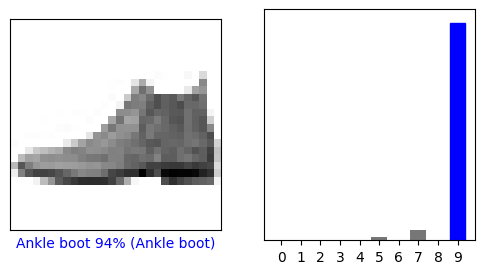

In [42]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(predictions[i], test_labels[i], test_images[i])
plt.subplot(1,2,2)
plot_value_array(predictions[i],  test_labels[i])
plt.show()

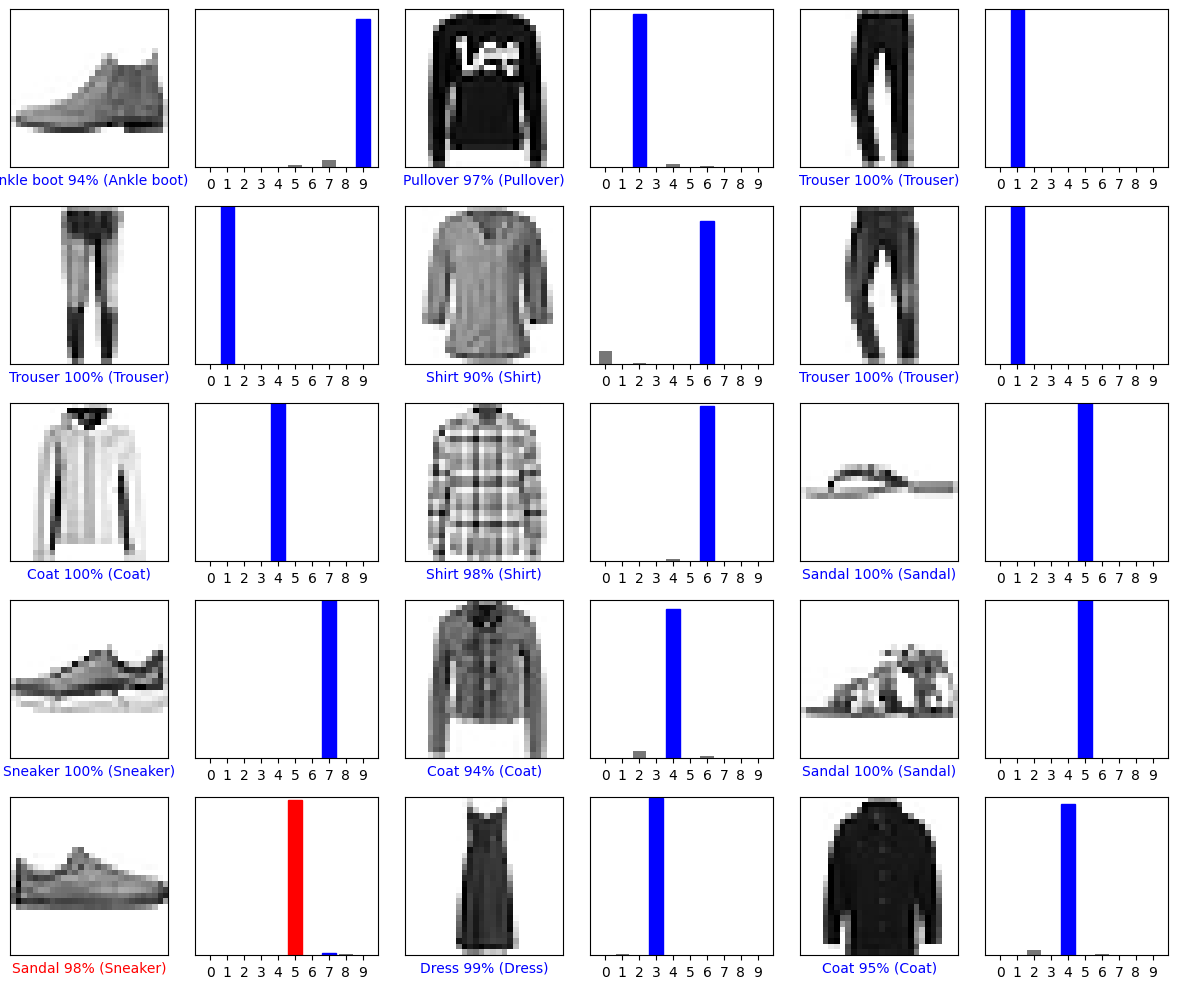

In [43]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(predictions[i], test_labels[i], test_images[i])
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(predictions[i], test_labels[i])
plt.tight_layout()
plt.show()

<div style="border: solid 3px #fff;">
    <h1 style="text-align: center; color:#fff; font-family:Georgia; font-size:26px;">Exercise</h1>
    <h1 style="text-align: left; color:#fff; font-family:Courier; font-size:16px;"> &emsp; In order to diagnose the model, we can focus on the errors that the model made, such as 12th samples which should be Sneaker, but model predicted Sandal. But we can also find the confidence of model as well. Find the samples that have a prediction with probability of less than 70% and display some of them. </h1>
    <p style='text-align: left;'> </p>
</div>

In [ ]:
#your code is missing here
max = np.argmax(predictions[0])
print(output2prob(predictions[0])[max])
print(predictions[0])
print(class_names[test_labels[0]])
print(class_names[max])

low_percentage_predictions = []

for index in range(len(predictions)):
    prediction = predictions[index]
    max = np.argmax(prediction)
    prob = output2prob(prediction)[max]
    if prob < 0.7:
        low_percentage_predictions.append({
            'prediction': prediction,
            'prediction_label': test_labels[max],
            'true_label': test_labels[index],
            'image': test_images[index]
        })

print(low_percentage_predictions[0])

num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(low_percentage_predictions[i]['prediction'], low_percentage_predictions[i]['true_label'], low_percentage_predictions[i]['image'])
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(low_percentage_predictions[i]['prediction'], low_percentage_predictions[i]['true_label'])
plt.tight_layout()
plt.show()


<div style="border: solid 3px #fff;">
    <h1 style="text-align: center; color:#fff; font-family:Georgia; font-size:26px;">Exercise</h1>
    <h1 style="text-align: left; color:#fff; font-family:Courier; font-size:16px;"> &emsp; Find the list of samples that wrongly predicted. Then calculate how many of them (%) are corrcetly predicted as second maximum probablity. </h1>
    <p style='text-align: left;'> </p>
</div>

In [ ]:
#your code is missing here
wrong_predictions = []

for low_percentage_prediction in low_percentage_predictions:
    prediction = low_percentage_prediction['prediction']
    predicted_label = np.argmax(prediction)
    true_label = low_percentage_prediction['true_label']
    if predicted_label != true_label:
        wrong_predictions.append(low_percentage_prediction)


num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(wrong_predictions[i]['prediction'], wrong_predictions[i]['true_label'], wrong_predictions[i]['image'])
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(wrong_predictions[i]['prediction'], wrong_predictions[i]['true_label'])
plt.tight_layout()
plt.show()

<div style="border: solid 3px #fff;">
    <h1 style="text-align: center; color:#fff; font-family:Georgia; font-size:26px;">Exercise</h1>
    <h1 style="text-align: left; color:#fff; font-family:Courier; font-size:16px;"> &emsp; One of the usual way to control the training from overfitting is Early Stopping. The early stopping ends the training before all epochs are done, if model can not improve its performance on validation (test here). By changing the test function and training loop, write a code that implement the early stopping and save the last best model. </h1>
    <p style='text-align: left;'> </p>
</div>

In [68]:
# your code is missing here
# define loss and optimizer
model = NeuralNetwork3().to(device)

print("Nombre de paramètres:", num_params(model))

loss_fn = nn.CrossEntropyLoss() # Pour calculer l'erreur entre prediction et label
optimizer = torch.optim.SGD(model.parameters(), lr=1e-1) # Pour mettre à jour les paramètres du modèle avec comme pas le learning rate de 0.1

Nombre de paramètres: 269322


In [69]:
def train_early_stop(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    model.train()
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)

        # Compute prediction error
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation = modification des poids du modèle
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch % 100 == 0:
            loss, current = loss.item(), batch * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

def test_early_stop(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval()
    test_loss, correct = 0, 0
    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
    test_loss /= num_batches
    correct /= size
    print(f"Test : \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")
    return 100*correct

In [70]:
import datetime

# training loop
epochs = 100
last_best_score = test_early_stop(test_dataloader, model, loss_fn)
last_best_model = model
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train_early_stop(train_dataloader, model, loss_fn, optimizer)
    score = test_early_stop(test_dataloader, model, loss_fn)

    if score > last_best_score:
        last_best_score = score
        last_best_model = model
        print("New best model found!")
    else:
        model = last_best_model
        print("No improvement, stopping early.")
        break

model_name = "model_last_best_model.pth"
torch.save(model.state_dict(), model_name)
print("Saved PyTorch Model State to " + model_name)
print("Done!")


Test : 
 Accuracy: 7.5%, Avg loss: 2.306821 

Epoch 1
-------------------------------
loss: 2.312678  [    0/60000]
loss: 0.919238  [ 6400/60000]
loss: 0.574515  [12800/60000]
loss: 0.719671  [19200/60000]
loss: 0.629548  [25600/60000]
loss: 0.513277  [32000/60000]
loss: 0.549387  [38400/60000]
loss: 0.603759  [44800/60000]
loss: 0.623988  [51200/60000]
loss: 0.468830  [57600/60000]
Test : 
 Accuracy: 79.3%, Avg loss: 0.553168 

New best model found!
Epoch 2
-------------------------------
loss: 0.428712  [    0/60000]
loss: 0.449085  [ 6400/60000]
loss: 0.404092  [12800/60000]
loss: 0.461089  [19200/60000]
loss: 0.416535  [25600/60000]
loss: 0.437827  [32000/60000]
loss: 0.418858  [38400/60000]
loss: 0.527737  [44800/60000]
loss: 0.530647  [51200/60000]
loss: 0.437125  [57600/60000]
Test : 
 Accuracy: 82.7%, Avg loss: 0.473174 

New best model found!
Epoch 3
-------------------------------
loss: 0.329446  [    0/60000]
loss: 0.356198  [ 6400/60000]
loss: 0.326475  [12800/60000]
loss: 

In [75]:
model = NeuralNetwork3()
model.load_state_dict(torch.load("model_last_best_model.pth"))

# on récupère les prédictions avec le nouveau modèle
predictions,test_labels, test_images=predict(test_dataloader,model,device)

In [84]:
# Create data loaders with incorrect data.
low_percentage_predictions = []

for index in range(len(predictions)):
    prediction = predictions[index]
    max = np.argmax(prediction)
    prob = output2prob(prediction)[max]
    if prob < 0.7:
        low_percentage_predictions.append({
            'prediction': prediction,
            'prediction_label': test_labels[max],
            'true_label': test_labels[index],
            'image': test_images[index],
            'index': index
        })
print("Number of low percentage predictions: ", len(low_percentage_predictions))

errors = []
for low_percentage_prediction in low_percentage_predictions:
    prediction = low_percentage_prediction['prediction']
    predicted_label = low_percentage_prediction['prediction_label']
    true_label = low_percentage_prediction['true_label']
    if predicted_label != true_label:
        errors.append(low_percentage_prediction)

print("Number of errors: ", len(errors))

second_chance = []
for error in errors:
    prediction = error['prediction']
    true_label = error['true_label']
    sorted_indices = np.argsort(output2prob(prediction))
    second_max_index = sorted_indices[-2]
    if second_max_index == true_label:
        second_chance.append(error)

print("Number of errors correctly predicted as second maximum: ", len(second_chance))
print("Percentage: ", 100 * len(second_chance) / len(errors), "%")


Number of low percentage predictions:  2015
Number of errors:  1894
Number of errors correctly predicted as second maximum:  537
Percentage:  28.352692713833157 %


<div style="border: solid 3px #fff;">
    <h1 style="text-align: center; color:#fff; font-family:Georgia; font-size:26px;">Exercise : Custom loss function</h1>
    <h1 style="text-align: left; color:#fff; font-family:Courier; font-size:16px;"> &emsp; The defined categories in fashion MINIST dataset do not taken into account the similariry between classes. It means that a Bag and a Dress are more different than a Coat and a Dress. So we would like to taken into account this differences into loss function. In other words, when model makes mistake between two classes that are very different, we would like to punish model more than when model make a mistake beween two classes which are more similar. </h1>
    <h1 style="text-align: left; color:#fff; font-family:Courier; font-size:16px;"> &emsp; We define 3 subclasses as Clothing, Footware, Container. If the predicted class and real class are from different subclass we add an additional value to the loss. </h1>
    <p style='text-align: left;'> </p>
</div>

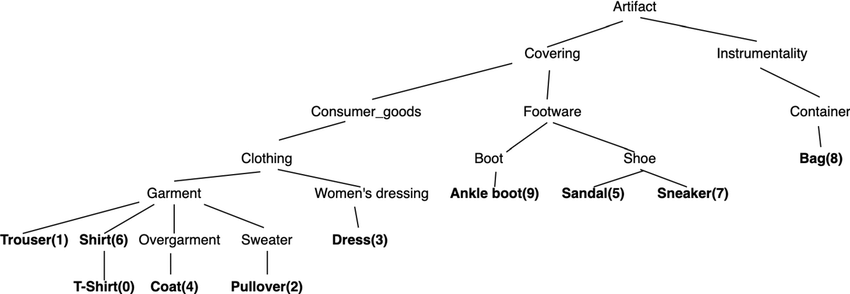

In [9]:
def my_loss(output, target):
    loss = nn.CrossEntropyLoss()(output, target)
    return loss